## Intro


Utiliser l'environnement: _py310_fanalysis_


In [1]:
import os


In [20]:
#chargement - index_col = 0 pour indiquer que la colonne n°0 est un label
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fanalysis.ca import CA
import scipy.stats as stats

In [ ]:
os.getcwd()

In [50]:
file_choice = "data/Behr and Michon 2014 ministres plus haut postes.csv"

file_choice = "data/femmes_ministres.csv"
D = pd.read_csv(file_choice,
                    sep='\t', index_col=0)


In [51]:

#affichage des données
print(D)

#nombre de modalités ligne
K = D.shape[0]

#nombre de modalités colonnes
L = D.shape[1]

# Effectif total
n = np.sum(D.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

                                        GF  DF  GH  DH
metier_vs_genre                                       
agriculteur_commerçant_entrepr_employe   2   2  22  17
profession_liberale                      4  10  10  20
haut_fonctionnaire                      11   7  20  36
cadre_sup_public                         7  12  40  27
cadre_sup_prive                          2   8  11  27
professions_intermediaire                3   4   9   5
collaborateur_politique                  7   2   7  14
autre_ou_manque                          3   1   3   7
Dimensions: ( 8 , 4 ), effectif: 360 , nombre max. facteurs: 3


In [52]:
### Valeurs produites par une fonction
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),1)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)

Chi2 : 41.9140349140649 , dof : 21
p-value : 0.004313666987010336
phi2 = inertie (variance totale) : 0.11642787476129139
Cramer:  0.19700074006738436


In [53]:
# Situation d'indépendance
exp_df = pd.DataFrame(expected.round(0).astype(int))
exp_df.index =D.index
exp_df.columns=D.columns
print(exp_df)

                                        GF  DF  GH  DH
metier_vs_genre                                       
agriculteur_commerçant_entrepr_employe   5   5  15  18
profession_liberale                      5   6  15  19
haut_fonctionnaire                       8   9  25  31
cadre_sup_public                         9  11  29  37
cadre_sup_prive                          5   6  16  20
professions_intermediaire                2   3   7   9
collaborateur_politique                  3   4  10  13
autre_ou_manque                          2   2   5   6


In [54]:

#lancer les calculs
afc = CA(row_labels=D.index,col_labels=D.columns)

In [55]:
afc.fit(D.values)

CA(col_labels=Index(['GF', 'DF', 'GH', 'DH'], dtype='object'),
   row_labels=Index(['agriculteur_commerçant_entrepr_employe', 'profession_liberale',
       'haut_fonctionnaire', 'cadre_sup_public', 'cadre_sup_prive',
       'professions_intermediaire', 'collaborateur_politique',
       'autre_ou_manque'],
      dtype='object', name='metier_vs_genre'))

In [ ]:
#propriétés de l'objet
print(dir(afc))

In [ ]:
#seuil -- moyenne des valeurs propres
meanValPropre = np.mean(afc.eig_[0])
print(meanValPropre)

#ou seuil sur les pourcentages
print(1/Hmax)

In [56]:
#affichage des valeurs propres
print(afc.eig_)

[[6.21251976e-02 3.51813638e-02 1.91213134e-02]
 [5.33593847e+01 3.02173031e+01 1.64233122e+01]
 [5.33593847e+01 8.35766878e+01 1.00000000e+02]]


In [ ]:
#seuil -- moyenne des valeurs propres
meanValPropre = np.mean(afc.eig_[0])
print(meanValPropre)

#ou seuil sur les pourcentages
print(1/Hmax)

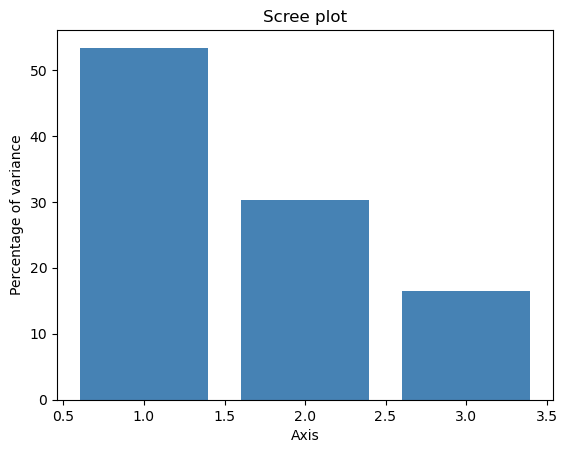

In [57]:
#affichage graphique des v.p.
afc.plot_eigenvalues('percentage')

In [ ]:
#informations sur les modalités lignes
print(afc.row_topandas())

In [ ]:
#profil marginal des modalités lignes
profMargLig = numpy.sum(D.values,axis=1)/n
print(profMargLig)

In [ ]:
#contributions
contribLig = (numpy.reshape(profMargLig,(8,1))*afc.row_coord_**2)/afc.eig_[0]*100
print(contribLig)

In [ ]:
#distance à l'origine - distance du KHI2
distoLig = numpy.sum(afc.row_coord_**2,axis=1)
print(distoLig)

In [ ]:
#cos2 des lignes
cos2Lig = afc.row_coord_**2/numpy.reshape(distoLig,(8,1))*100
print(cos2Lig)

In [ ]:
#statistiques pour les points colonnes
print(afc.col_topandas())

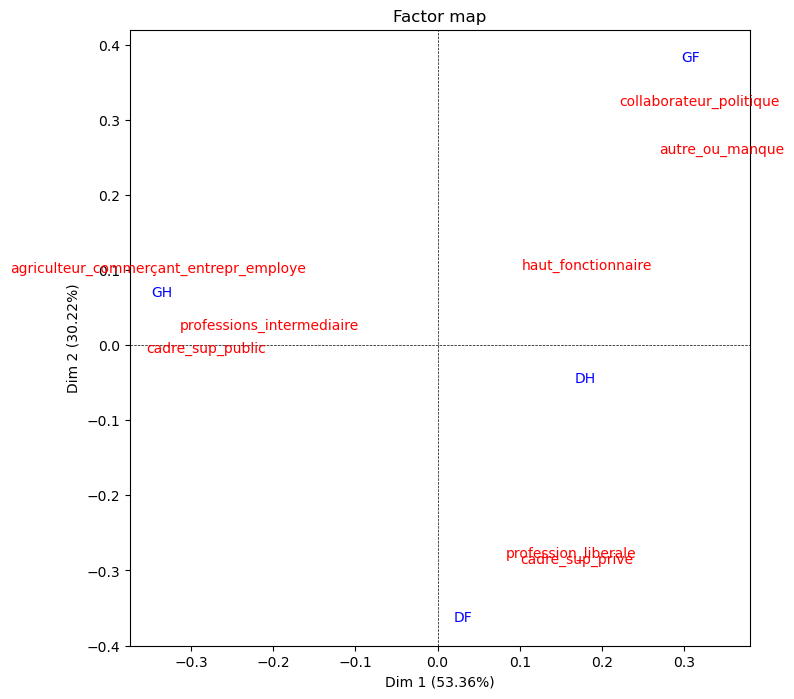

In [58]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(8,8))

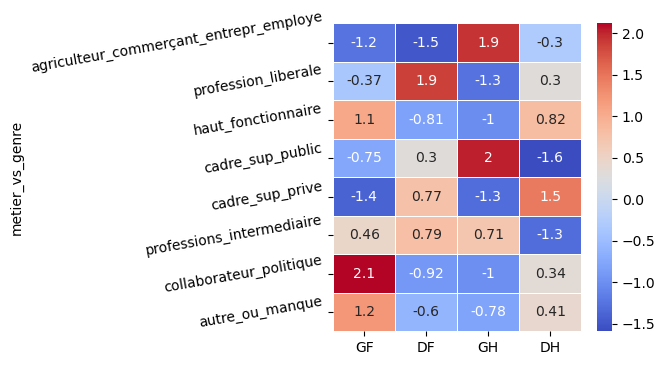

In [59]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index


fig, ax = plt.subplots(figsize=(4,4))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = residus_ponderes.index
p = g.set_yticklabels(labels, rotation=10)

plt.show()


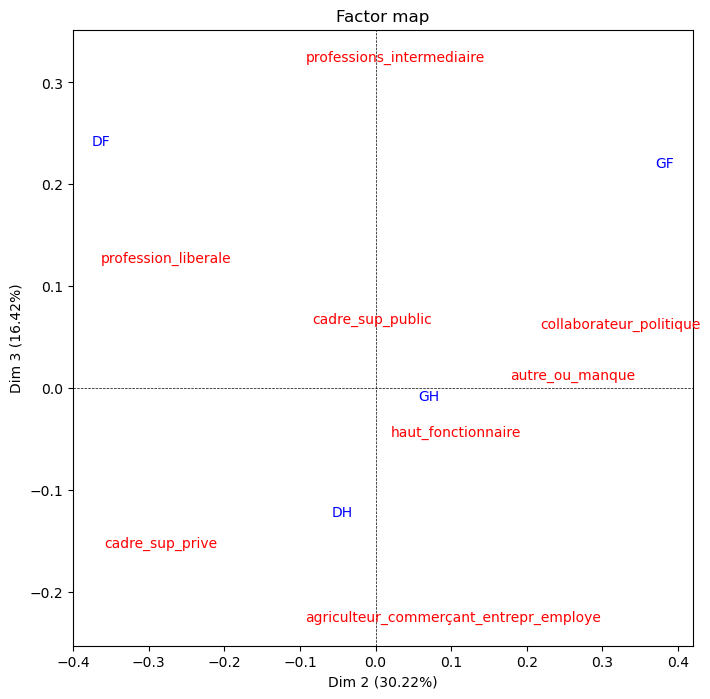

In [60]:
#représentation simultanée
afc.mapping(num_x_axis=2,num_y_axis=3,figsize=(8,8))

### Suit expérimentation sur la projection

In [ ]:
#point supplémentaire
bourgeois = numpy.array([638,537,1084,141])

#coordonnées factorielles
coordBourges = afc.transform(numpy.reshape(bourgeois,(1,4)))
print(coordBourges)

In [ ]:
#profil marginal des modalités colonnes
profMargCol = numpy.sum(D.values,axis=0)/n
print(profMargCol)

In [ ]:
#profil des bourgeois
profBourges = bourgeois/numpy.sum(bourgeois)

#distance à l'origine de la modalité supplémentaire
distoBourges = numpy.sum(1/profMargCol*(profBourges-profMargCol)**2)
print(distoBourges)

In [ ]:
#COS2 de la représentation
cos2Bourges = (coordBourges**2)/distoBourges
print(cos2Bourges)

In [ ]:
#soit pour récapituler
print(pandas.DataFrame(numpy.transpose([coordBourges[0],cos2Bourges[0]]),index=['Dim.1','Dim.2','Dim.3'],columns=['Coord','Cos2']))

In [ ]:
#librairie graphique
import matplotlib.pyplot as plt

#reste à l'ajouter dans le plan factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Modalité ligne supplémentaire")

#modalités ligne
for i in range(D.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i],color='red')

#modalités colonne
for i in range(D.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i],color='blue')
    
#point supplémentaire
ax.text(coordBourges[0][0],coordBourges[0][1],"Bourgeois",color='green')
    
plt.show()